In [ ]:
#deaths change by time
#necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
import random

# Cleaning, transforming and visualizing

## Data Wrangling:
### Creating a matrix with a binary indicator for whether they responded to a given offer
### Ensure that in doing so, NAN values are dealt with appropriately

In [ ]:
#all world covid19 numbers from kaggle
#choose date column
covid=pd.read_csv('all-states-history.csv',parse_dates=['date'])

In [6]:
covid.sample(10)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
20259,2020-03-10,IA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,40.0,11,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1828,2021-02-03,NV,4373.0,NaN,49,NaN,NaN,NaN,1145.0,0,...,2511160.0,7840,NaN,NaN,NaN,NaN,1339525.0,2942,NaN,0
6290,2020-11-15,KS,1256.0,NaN,0,NaN,4327.0,4327.0,811.0,0,...,706787.0,0,NaN,NaN,NaN,NaN,700505.0,0,NaN,0
1335,2021-02-12,TX,40095.0,NaN,324,NaN,NaN,NaN,8607.0,0,...,18605754.0,99489,981011.0,2127545.0,NaN,NaN,NaN,0,18605754.0,99489
19904,2020-03-17,MI,2.0,4.0,0,1.0,NaN,NaN,NaN,0,...,1100.0,835,NaN,NaN,NaN,NaN,NaN,0,1100.0,835
8865,2020-09-30,IN,3632.0,3405.0,20,227.0,12814.0,12814.0,975.0,56,...,2133262.0,31627,NaN,NaN,NaN,NaN,1379850.0,8495,2133262.0,31627
7973,2020-10-16,MA,9702.0,9482.0,30,220.0,12971.0,12971.0,513.0,25,...,5012963.0,57641,NaN,NaN,123893.0,160204.0,2486650.0,14962,5012963.0,57641
8987,2020-09-28,MP,2.0,2.0,0,NaN,4.0,4.0,NaN,0,...,14846.0,0,NaN,NaN,NaN,NaN,14845.0,0,19835.0,0
3901,2020-12-28,NY,29629.0,NaN,118,NaN,NaN,NaN,7559.0,0,...,24753360.0,124866,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9596,2020-09-17,LA,5311.0,5143.0,17,168.0,NaN,NaN,663.0,0,...,2124190.0,9006,NaN,NaN,NaN,NaN,NaN,0,2123151.0,9006


In [8]:
covid.shape

(20780, 41)

In [ ]:
'''
#creaate random binaries to create sex column,0=male,1=female
sex=np.random.randint(2, size=len(covid))

#creaate sex columns
covid["sex"]=sex

#make dtype of this column as category
covid["sex"] = covid["sex"].astype('category')
'''

In [17]:
covid.dtypes

date                                datetime64[ns]
state                                       object
death                                      float64
death_confirmed                            float64
deathIncrease                                int64
deathProbable                              float64
hospitalized                               float64
hospitalizedCumulative                     float64
hospitalizedCurrently                      float64
hospitalizedIncrease                         int64
inIcuCumulative                            float64
inIcuCurrently                             float64
negative                                   float64
negativeIncrease                             int64
negativeTestsAntibody                      float64
negativeTestsPeopleAntibody                float64
negativeTestsViral                         float64
onVentilatorCumulative                     float64
onVentilatorCurrently                      float64
positive                       

In [100]:
#count empty cells
covid.isna().sum()

date                                    0
state                                   0
death                                 850
death_confirmed                     11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

In [19]:
#so we can drop this field if we don't plan working on countries which have states and it has lots of missing values
#drop columns starts with total,positive,negative,hospitalized,currently
'''
covid.drop(list(covid.filter(regex = 'total')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'positive')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'negative')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'hospitalized')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'Currently')), axis = 1, inplace = True)
#list some other column names we want to drop
cols=['deathIncrease','deathProbable', 'inIcuCumulative', 'onVentilatorCumulative','recovered']
#dropping columns list we defined above, different technique
covid.drop(columns=cols, inplace=True)
#another methor to filter columns but we won't use it now
#covid.loc[:,~covid.columns.str.contains('^test', case=False)]'''

"\ncovid.drop(list(covid.filter(regex = 'total')), axis = 1, inplace = True)\ncovid.drop(list(covid.filter(regex = 'positive')), axis = 1, inplace = True)\ncovid.drop(list(covid.filter(regex = 'negative')), axis = 1, inplace = True)\ncovid.drop(list(covid.filter(regex = 'hospitalized')), axis = 1, inplace = True)\ncovid.drop(list(covid.filter(regex = 'Currently')), axis = 1, inplace = True)\n#list some other column names we want to drop\ncols=['deathIncrease','deathProbable', 'inIcuCumulative', 'onVentilatorCumulative','recovered']\n#dropping columns list we defined above, different technique\ncovid.drop(columns=cols, inplace=True)\n#another methor to filter columns but we won't use it now\n#covid.loc[:,~covid.columns.str.contains('^test', case=False)]"

In [20]:
#change deathConfirmed column name just for practice
covid = covid.rename(columns={'deathConfirmed': 'death_confirmed','positiveTestsPeopleAntigen':'positive Tests People Antigen'})

In [21]:
#check dimension
covid.shape

(20780, 41)

In [22]:
#fill missing values in 'death', 'death_confirmed' column with window mean
#covid[['death', 'death_confirmed']] = covid[['death', 'death_confirmed']].fillna(covid[['death', 'death_confirmed']].rolling(12,min_periods=3).mean())
#covid[['death', 'death_confirmed']].ffill(limit=1).rolling(window=3, min_periods=1).mean()
#we don't know what to do with this data yet

In [107]:
#cannot convert dtypes of float columns. i m leaving it here.
covid.loc[:, ~covid.columns.isin(['date','state'])].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [170]:
#total number of total deaths by state using groupby and aggregation with ascending order by number of deaths
grouped=covid.groupby(['state']).agg({'death':'sum'}).sort_values("death", axis = 0, ascending = False)
grouped

,death
state,
NY,8854467.0
CA,5733089.0
NJ,5352148.0
TX,5256010.0
FL,4471991.0
IL,3601219.0
PA,3384139.0
MA,3195657.0
MI,2892062.0


In [205]:
#monthly deaths
covid.groupby(covid.date.dt.month).agg({'death':'sum'})

,death
date,
1,11931561.0
2,13240581.0
3,3592592.0
4,941069.0
5,2587987.0
6,3356899.0
7,4071555.0
8,5012258.0
9,5648154.0


Text(0, 0.5, 'deaths')

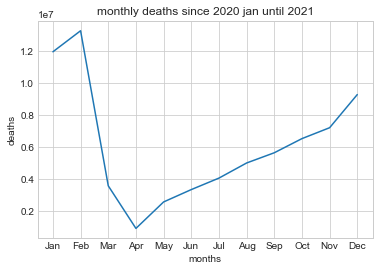

In [226]:
#monthly number of deaths
x=covid.date.dt.month
y=covid.groupby(covid.date.dt.month).agg({'death':'sum'})
#tried matplotlib histogram too, 
#plt.hist(x,y,color ='green',alpha = 0.7)
plt.plot(months,y)
# about tick names,it's just one year, it could be done like that
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']


plt.title("monthly deaths since 2020 jan until 2021")
plt.xlabel("months")
plt.ylabel("deaths")

In [ ]:
#reading months 2 alterneatives
#pd.DatetimeIndex(covid.Date).month
#df.Date.dt.month

In [206]:
covid.reset_index(inplace = True)
covid=covid.set_index('index', drop=True)

In [207]:
#monthly over all death counts using different method
#a=pd.DatetimeIndex.groupby(covid.Date).month.sum()
monthly_deaths=covid['death'].groupby([[d.month for d in covid.date]]).sum()
#it must be int because death numbers must be float
monthly_deaths=monthly_deaths.astype(int)

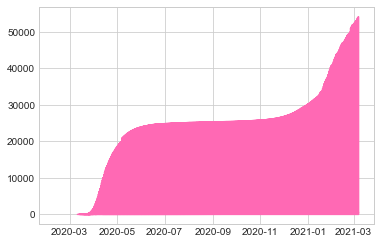

In [212]:
#let's plot increase in time since 2020
plt.plot(covid.date,covid['death'],c='hotpink')
plt.grid(True)
plt.xticks=months
plt.show()

#different result than previos calculation. it's not showing me previous result

In [250]:
covid.fillna(value=covid.mean(),inplace=True)

<ipython-input-250-1e3ee82d835f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  covid.fillna(value=covid.mean(),inplace=True)


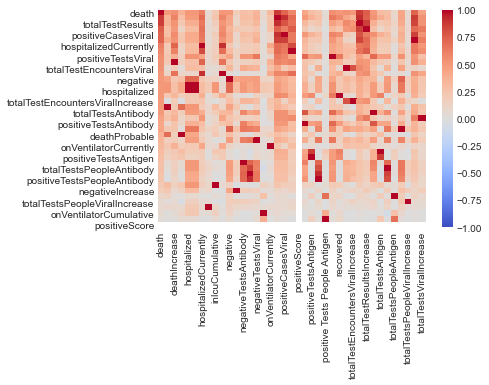

In [251]:
corrMatrix=covid.corr()
sns.heatmap(corrMatrix.sort_values(by=['death'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=False)
plt.show()

# Modelling
### Visualizing clusters with PCA

In [224]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [256]:
#first try training deaths-negative relationship
X=covid.death
y=covid.negative
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [253]:
X

index
0          305.000000
1        10148.000000
2         5319.000000
3            0.000000
4        16328.000000
             ...     
20775     3682.216859
20776     3682.216859
20777     3682.216859
20778     3682.216859
20779     3682.216859
Name: death, Length: 20780, dtype: float64

In [76]:
#X['date']=X['date'].dt.strftime("%Y%m%d").astype(int)

In [254]:
regressor = PCA(n_components=1)
regressor.fit(X.values.reshape(-1, 1), y)
y_pred= regressor.predict(X_train)

print(y_pred)

AttributeError: 'PCA' object has no attribute 'predict'

In [48]:
for i in X.columns:     #df.columns[w:] if you have w column of line description 
    X[i] = X[i].fillna(X[i].median() )

X = X.ix[:,:].values

TypeError: cannot perform median with type datetime64[ns]

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

ValueError: Expected 2D array, got 1D array instead:
array=[  305.         10148.          5319.         ...  3682.21685901
  3682.21685901  3682.21685901].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [257]:
model = sm.OLS()
results = model.fit(X_train)
print(results.summary())

TypeError: __init__() missing 1 required positional argument: 'endog'

# Conclusions